In [4]:
import sys, os
from threading import Thread, Event, Timer
from queue import Queue
import time

In [5]:
class ThreadClass(Thread):
    def __init__(self):
        super().__init__()
        self.running = Event()
        self.sleep = Event()
        self.queue = Queue()
        
        
    def stop(self):
        self.running.set()
        self.sleep.set()
        time.sleep(0.001)
        self.queue.put(None)
        
    def run(self):
        i = 1000
        while not self.running.is_set():
            i += 1
            self.queue.put(i)
            self.sleep.wait(1)


In [6]:
thread = ThreadClass()
thread.start()
t = Timer(2, thread.stop)
t.start()

m = Timer(1, lambda : print('timer'))
m.start()
m.cancel()
print(m)
print(f'Alarm is alive: {m.is_alive()}')

try:
    while thread.is_alive():
        print(f'Got from queue {thread.queue.get(timeout=2)}')
    print('Done')
except KeyboardInterrupt:
    print('Interrupted')


<Timer(Thread-6, started 140337737602816)>
Alarm is alive: True
Got from queue 1001
Got from queue 1002
Got from queue 1003
Done


In [7]:
from collections import OrderedDict

d = OrderedDict()
d['a'] = 1
d['b'] = 2
d['c'] = 3
k = list(d)[0]

print(f'First key: {k}')
print(f'Len: {len(d)}')
print(k, d.pop(k))
print(d.popitem(last=False))
print(d.popitem())



First key: a
Len: 3
a 1
('b', 2)
('c', 3)


In [8]:
import time 
print(time.strftime("%Z", time.localtime()))
tz = time.tzname
print(tz)
sys.path.append('../venv/lib/python3.8/site-packages')
from datetime import datetime
import pytz
from pytz import common_timezones, all_timezones, country_timezones

if 'NZDT' not in all_timezones:
    print('NZDT not in pytz')
print(time.timezone / 3600.0)
tznow = datetime.now().astimezone()
print(tznow.tzname())


NZST
('NZST', 'NZDT')
NZDT not in pytz
-12.0
NZST


In [25]:
import subprocess as sp 
from threading import Thread, Event, Timer


def doCmd(cmd):
    def _background(cmd):
        sp.Popen(cmd).wait()

    Thread(target=_background, args=[cmd], daemon=True).start()

doCmd(['sleep', '10'])

print('Done')


Done


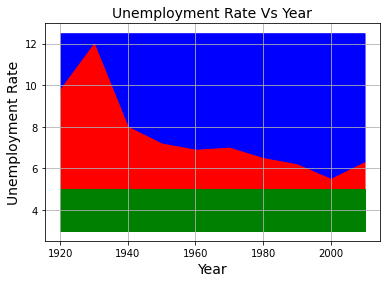

In [2]:
p = '/home/mark/repos/pingTest/venv/lib/python3.8/site-packages'
if p not in sys.path:
    sys.path.append(p)
   
import matplotlib.pyplot as plt
   
Year = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
Unemployment_Rate = [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
flat = [5 for _ in Unemployment_Rate]

plt.fill_between(Year, Unemployment_Rate, 12.5, color='blue')
plt.fill_between(Year, Unemployment_Rate, flat, color='red')
plt.fill_between(Year, flat, 3, color='green')

# plt.plot(Year, Unemployment_Rate, color='red', marker='o')
plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate', fontsize=14)
plt.grid(True)
plt.show()



2021-01-03 00:00:00
391


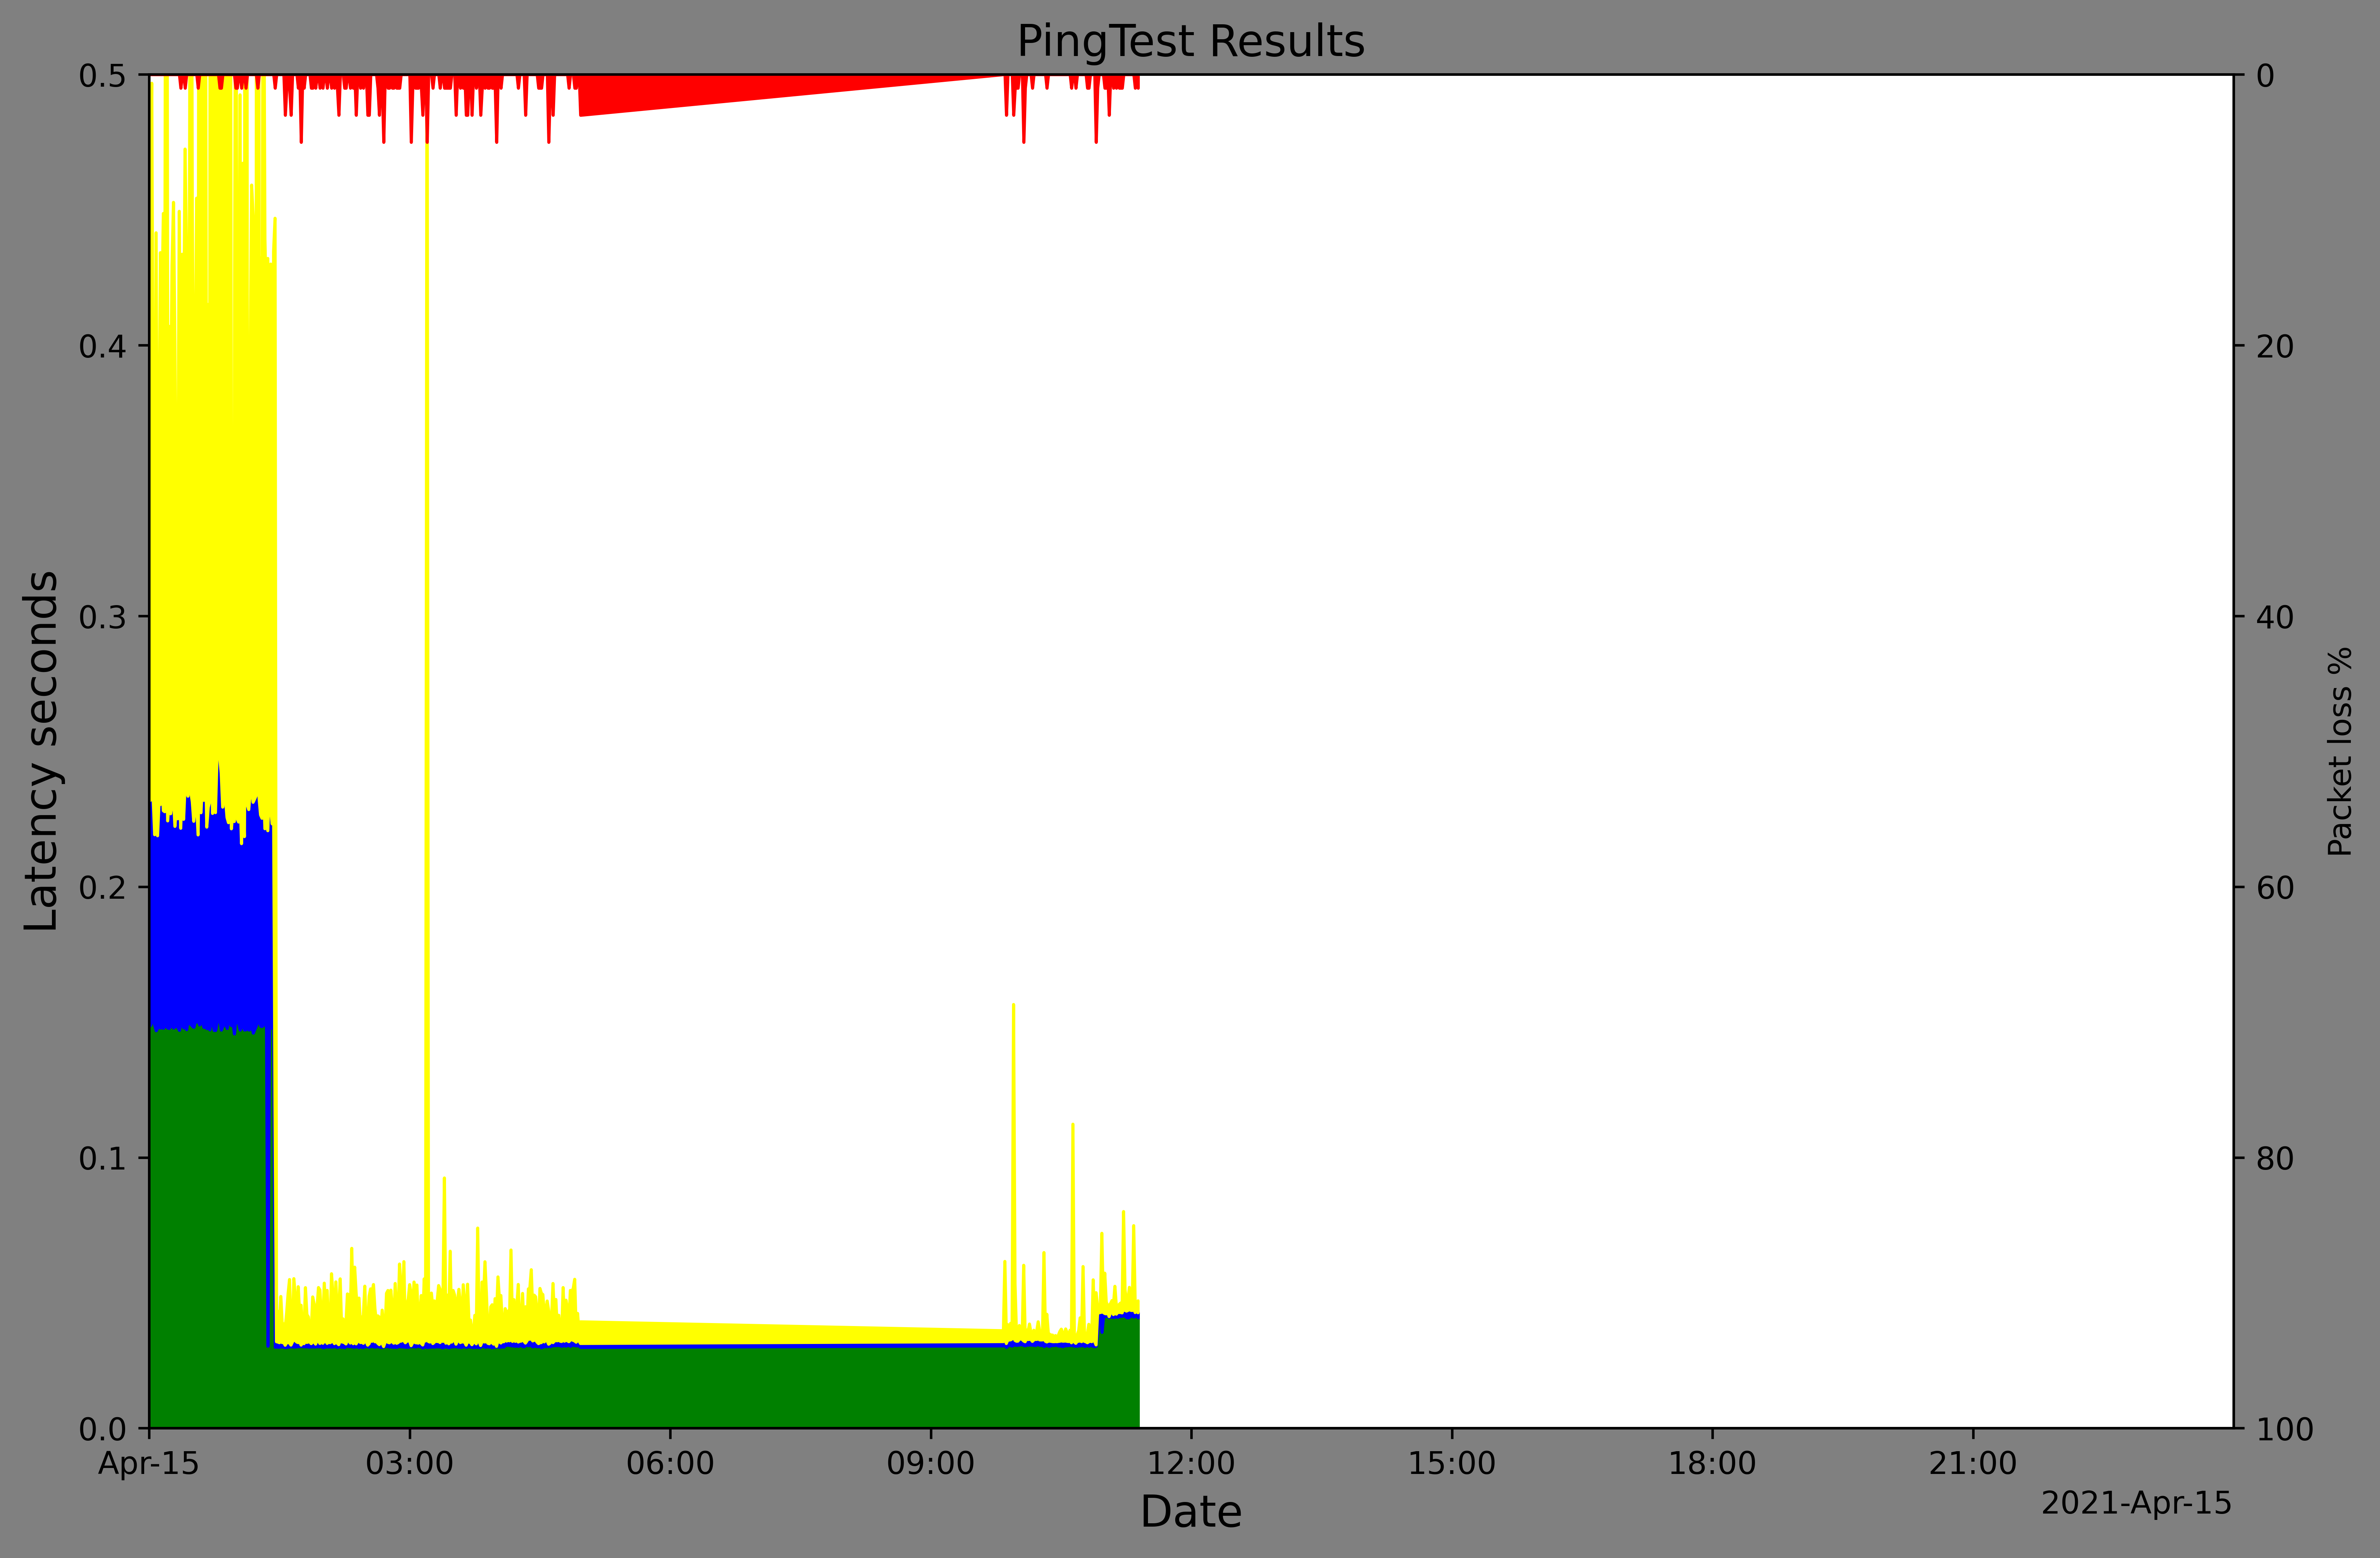

In [1]:
import sqlite3
from dateutil.parser import parse, isoparse
from datetime import datetime, timedelta



p = '/home/mark/repos/pingTest/venv/lib/python3.8/site-packages'
if p not in sys.path:
    sys.path.append(p)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib

con = sqlite3.connect('../pingtest-summ-dev.sqlite')
cur = con.cursor()

def removeNone(n):
    return 0 if n is None or n == 'None' else n

i = 0
pDate = []
min = []
avg = []
max = []
dropped = []

startDate = '2021-04-15'
startDateObj = parse(startDate).astimezone()
endDateObj = startDateObj + timedelta(hours=23, minutes=59, seconds=59, milliseconds=999)
print(parse('03-01-2021', dayfirst=True))
for line in cur.execute("select date, unixdate, min, avg, max, (dropped*100/60) "
                        "from pingsumm where date(date, 'localtime') = date(?, 'localtime') ", (startDate,)):

    i += 1
    # pDate.append(isoparse(line[0]).astimezone())
    pDate.append(datetime.fromtimestamp(line[1]).astimezone())
    min.append(float(removeNone(line[2])))
    avg.append(removeNone(line[3]))
    max.append(removeNone(line[4]))
    dropped.append(removeNone(line[5]))
    
print (i)

matplotlib.rcParams['timezone'] = 'NZ'
locator = mdates.AutoDateLocator(minticks=12, maxticks=12)
formatter = mdates.ConciseDateFormatter(locator)

fig, (plot1) = plt.subplots(figsize=(12,8), dpi=600)
fig.set_facecolor('grey')

# plt.figure(figsize=(12,8), dpi=600).set_facecolor('grey')

plot1.set_title('PingTest Results', fontsize=14)

plot1.xaxis.set_major_locator(locator)
plot1.xaxis.set_major_formatter(formatter)
plot1.set_xlim(startDateObj, endDateObj)

plot1.fill_between(pDate, min, color='green')
plot1.fill_between(pDate, avg, min, color='blue')
plot1.fill_between(pDate, avg, max, color='yellow')
plot1.set_ylim(0, 0.5)
plot1.set_xlabel('Date', fontsize=14)
plot1.set_ylabel('Latency seconds', fontsize=14)


plot2 = plt.twinx()
plot2.xaxis.set_major_locator(locator)
plot2.xaxis.set_major_formatter(formatter)

plot2.fill_between(pDate, dropped, color='red')
plot2.set_ylim(100, 0)
plot2.set_ylabel('Packet loss %')
plot2.set_facecolor('grey')

plt.savefig('../pingtest.png', bbox_inches='tight')
plt.show()



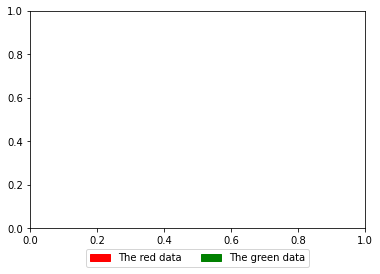

In [7]:
p = '/home/mark/repos/pingTest/venv/lib/python3.8/site-packages'
if p not in sys.path:
    sys.path.append(p)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_legend = mpatches.Patch(color='red', label='Dropped Packets (%)')
green_legend = mpatches.Patch(color='green', label='Minimum latency (s)')
blue_legend = mpatches.Patch(color='blue', label='Average latency (s)')
yellow_legend = mpatches.Patch(color='yellow', label='Maximum latency (s)')
plt.legend(handles=[green_legend, blue_legend, yellow_legend, red_legend], ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.2))

plt.show()